In [609]:
import datetime
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [610]:
# Creating Data Frame for the tn.movie_budgets file
df_budget = pd.read_csv('/Users/Vidya/Flatiron/Project/tn.movie_budgets.csv')
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [611]:
df_budget = df_budget.drop_duplicates(subset=None, keep='first')
df_budget.duplicated().value_counts()

False    5782
dtype: int64

In [612]:
# Formatting the Release Date column
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'], infer_datetime_format=True)
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [613]:
# Replacing the '$' sign
df_budget['production_budget'] = df_budget['production_budget'].str.replace('$','')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$', '')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [614]:
# Delete commas from "production_budget,domestic_gross and worldwide_gross columns"
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [615]:
import re
df_budget['movie'] = df_budget['movie'].apply(lambda x: re.sub(r'\W+','',x.lower()))
df_budget.sample(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2169,70,2003-07-02,legallyblonde2redwhiteblonde,25000000,90639088,125339088
2977,78,2008-12-31,good,16000000,31631,31631
2979,80,2010-05-11,haeundae,16000000,0,64733391
5764,65,2007-12-31,tincanman,12000,0,0
322,23,2004-12-10,oceanstwelve,110000000,125531634,362989076


In [616]:
# Storing as int64 to hold large numeric values that will help in calculations
df_budget['production_budget'] = df_budget['production_budget'].astype('int64')
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype('int64')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype('int64')

# Dropping unnecessary columns
df_budget = df_budget.drop(columns = ['id'])
df_budget.sample(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
2879,2015-02-20,mcfarlandusa,17000000,44480275,45707924
4180,2006-11-10,comeearlymorning,6000000,119452,119452
3619,1999-03-12,thecorruptor,10000000,15164492,15164492
2928,1989-07-14,whenharrymetsallyâ,16000000,92823546,92961960
3892,2006-05-19,seenoevil,8000000,15032800,18828036


In [617]:
df_budget['Collections'] = df_budget['domestic_gross'] + df_budget['worldwide_gross']
df_budget['Profit'] = df_budget['Collections'] - df_budget['production_budget']
df_budget.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Collections,Profit
3924,2011-09-16,restless,8000000,163753,2772511,2936264,-5063736
1768,1981-12-04,reds,33500000,50000000,50000000,100000000,66500000
1591,2010-09-17,thetown,37000000,92186262,152566881,244753143,207753143


In [618]:
# Creating Data Frame for the title_basics file
df_genres = pd.read_csv('/Users/Vidya/Flatiron/Project/title.basics.csv')
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [619]:
# Checking for any duplicates
df_genres.drop_duplicates(subset=None, keep='first')
df_genres.duplicated().value_counts()
#df_genres.head()

False    146144
dtype: int64

In [620]:
# Renaming the column Primary title
df_genres = df_genres.rename(columns={'original_title' : 'movie'})
df_genres['movie']=df_genres['movie'].astype(str)
df_genres['movie'] = df_genres['movie'].apply(lambda y: re.sub(r'\W+','',y.lower()))
df_genres.head()

,tconst,primary_title,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,ashadkaekdin,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,theothersideofthewind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,sabsebadasukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,latelenovelaerrante,2017,80.0,"Comedy,Drama,Fantasy"


In [621]:
# Dropping unnecessary columns
df_genres = df_genres.drop(columns = ['primary_title','start_year'])
df_genres.head()

,tconst,movie,runtime_minutes,genres
0,tt0063540,sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,ashadkaekdin,114.0,"Biography,Drama"
2,tt0069049,theothersideofthewind,122.0,Drama
3,tt0069204,sabsebadasukh,NaN,"Comedy,Drama"
4,tt0100275,latelenovelaerrante,80.0,"Comedy,Drama,Fantasy"


In [622]:
df_rating = pd.read_csv('/Users/Vidya/Flatiron/Project/title.ratings.csv')
df_rating

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [623]:
# Merging files
#df_genre_rating = df_genres.merge(df_rating, on='tconst')
df_genre_rating = df_genres.merge(df_rating, on='tconst')
df_genre_rating.drop_duplicates(subset=None, keep='first')
df_genre_rating.duplicated().value_counts()
#df_genre_rating.sample(5)

False    73856
dtype: int64

In [624]:
df_genre_rating = df_genre_rating.drop(columns = ['numvotes'])

In [625]:
df_budget['release_year'] = pd.DatetimeIndex(df_budget['release_date']).year
df_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Collections,Profit,release_year
0,2009-12-18,avatar,425000000,760507625,2776345279,3536852904,3111852904,2009
1,2011-05-20,piratesofthecaribbeanonstrangertides,410600000,241063875,1045663875,1286727750,876127750,2011
2,2019-06-07,darkphoenix,350000000,42762350,149762350,192524700,-157475300,2019
3,2015-05-01,avengersageofultron,330600000,459005868,1403013963,1862019831,1531419831,2015
4,2017-12-15,starwarsepviiithelastjedi,317000000,620181382,1316721747,1936903129,1619903129,2017


In [626]:
# Creating Data Frame for the tmdb_movies file
df_tmdb_movies = pd.read_csv('/Users/Vidya/Flatiron/Project/tmdb.movies.csv')
df_tmdb_movies = df_tmdb_movies.rename(columns={'original_title' : 'movie'})
df_tmdb_movies ['movie'] = df_tmdb_movies ['movie'].apply(lambda y: re.sub(r'\W+','',y.lower()))
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,harrypotterandthedeathlyhallowspart1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,howtotrainyourdragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,ironman2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,toystory,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,Inception,8.3,22186


In [627]:
df_tmdb_movies.drop_duplicates(subset=None, keep='first')
df_tmdb_movies.info()
df_tmdb_movies.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
movie                26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
movie                0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [628]:
# Dropping unnecessary columns
df_tmdb_movies = df_tmdb_movies.drop(columns = ['Unnamed: 0','id','popularity','genre_ids','title','vote_count'])
df_tmdb_movies.head()

,original_language,movie,release_date,vote_average
0,en,harrypotterandthedeathlyhallowspart1,2010-11-19,7.7
1,en,howtotrainyourdragon,2010-03-26,7.7
2,en,ironman2,2010-05-07,6.8
3,en,toystory,1995-11-22,7.9
4,en,inception,2010-07-16,8.3


In [629]:
df_tmdb_movies['movie'] = df_tmdb_movies['movie'].str.lower()
df_tmdb_movies.head()

,original_language,movie,release_date,vote_average
0,en,harrypotterandthedeathlyhallowspart1,2010-11-19,7.7
1,en,howtotrainyourdragon,2010-03-26,7.7
2,en,ironman2,2010-05-07,6.8
3,en,toystory,1995-11-22,7.9
4,en,inception,2010-07-16,8.3


In [630]:
df_tmdb_movies['release_year'] = pd.DatetimeIndex(df_tmdb_movies['release_date']).year
df_tmdb_movies.sample(10)

,original_language,movie,release_date,vote_average,release_year
7279,en,theflaminglipsthesoftbulletin,2012-01-09,7.0,2012
22383,en,renegadestherequiempart1,2017-02-02,5.5,2017
11132,en,deliverusfromevil,2014-07-02,6.1,2014
7731,en,cybornetics,2012-01-01,4.0,2012
11005,en,hboboxingbradleyvsmarquez,2013-10-12,0.8,2013
9480,en,9days,2013-05-28,3.8,2013
7141,en,nazimysterytwinsfrombrazil,2012-12-31,8.5,2012
10945,en,dangerword,2013-11-07,2.0,2013
13394,en,drink,2014-01-01,8.0,2014
11991,en,nowinthewingsonaworldstage,2014-06-09,5.9,2014


In [678]:
df_merged = df_genre_rating.merge(df_tmdb_movies, on='movie').merge(df_budget, on='movie')
#df_merged = df_genre_rating.merge(df_tmdb_movies, on='movie', how='left').merge(df_budget, on='movie', how='left')
df_merged.drop_duplicates(subset=None, keep='first',inplace=True)
df_merged.duplicated().value_counts()
#df_merged.info()

False    2968
dtype: int64

In [632]:
df_merged = df_merged.drop(columns = ['release_year_x','release_date_x','vote_average'])

df_merged=df_merged.drop_duplicates(subset=['movie','release_date_y'], keep='first')
#df_merged[df_merged.duplicated(subset=['movie','release_date_y'], keep='first')]
#pd.concat(g for _, g in df_merged.groupby("movie") if len(g) > 1)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 3182
Data columns (total 13 columns):
tconst               1881 non-null object
movie                1881 non-null object
runtime_minutes      1857 non-null float64
genres               1880 non-null object
averagerating        1881 non-null float64
original_language    1881 non-null object
release_date_y       1881 non-null datetime64[ns]
production_budget    1881 non-null int64
domestic_gross       1881 non-null int64
worldwide_gross      1881 non-null int64
Collections          1881 non-null int64
Profit               1881 non-null int64
release_year_y       1881 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 205.7+ KB


In [633]:
df_merged = df_merged.rename(columns={'release_date_y' : 'release_date'})
df_merged = df_merged.rename(columns={'release_year_y' : 'release_year'})
df_merged = df_merged.rename(columns={'averagerating' : 'average_rating'})
df_merged

,tconst,movie,runtime_minutes,genres,average_rating,original_language,release_date,production_budget,domestic_gross,worldwide_gross,Collections,Profit,release_year
0,tt0249516,foodfight,91.0,"Action,Animation,Comedy",1.9,en,2012-12-31,45000000,0,73706,73706,-44926294,2012
1,tt0326592,theovernight,88.0,NaN,7.5,en,2015-06-19,200000,1109808,1165996,2275804,2075804,2015
3,tt0337692,ontheroad,124.0,"Adventure,Drama,Romance",6.1,en,2013-03-22,25000000,720828,9313302,10034130,-14965870,2013
6,tt0359950,thesecretlifeofwaltermitty,114.0,"Adventure,Comedy,Drama",7.3,en,2013-12-25,91000000,58236838,187861183,246098021,155098021,2013
7,tt0365907,awalkamongthetombstones,114.0,"Action,Crime,Drama",6.5,en,2014-09-19,28000000,26017685,62108587,88126272,60126272,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,tt7766254,big,99.0,Documentary,8.5,en,1988-06-03,18000000,114968774,151668774,266637548,248637548,1988
3179,tt7784604,hereditary,127.0,"Drama,Horror,Mystery",7.3,en,2018-06-08,10000000,44069456,70133905,114203361,104203361,2018
3180,tt8043306,teefaintrouble,155.0,"Action,Comedy,Crime",7.4,ur,2018-07-20,1500000,0,98806,98806,-1401194,2018
3181,tt8632862,fahrenheit119,128.0,Documentary,6.7,en,2018-09-21,5000000,6352306,6653715,13006021,8006021,2018


In [634]:
df_merged.drop_duplicates(subset=None, keep="first")
df_merged

,tconst,movie,runtime_minutes,genres,average_rating,original_language,release_date,production_budget,domestic_gross,worldwide_gross,Collections,Profit,release_year
0,tt0249516,foodfight,91.0,"Action,Animation,Comedy",1.9,en,2012-12-31,45000000,0,73706,73706,-44926294,2012
1,tt0326592,theovernight,88.0,NaN,7.5,en,2015-06-19,200000,1109808,1165996,2275804,2075804,2015
3,tt0337692,ontheroad,124.0,"Adventure,Drama,Romance",6.1,en,2013-03-22,25000000,720828,9313302,10034130,-14965870,2013
6,tt0359950,thesecretlifeofwaltermitty,114.0,"Adventure,Comedy,Drama",7.3,en,2013-12-25,91000000,58236838,187861183,246098021,155098021,2013
7,tt0365907,awalkamongthetombstones,114.0,"Action,Crime,Drama",6.5,en,2014-09-19,28000000,26017685,62108587,88126272,60126272,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,tt7766254,big,99.0,Documentary,8.5,en,1988-06-03,18000000,114968774,151668774,266637548,248637548,1988
3179,tt7784604,hereditary,127.0,"Drama,Horror,Mystery",7.3,en,2018-06-08,10000000,44069456,70133905,114203361,104203361,2018
3180,tt8043306,teefaintrouble,155.0,"Action,Comedy,Crime",7.4,ur,2018-07-20,1500000,0,98806,98806,-1401194,2018
3181,tt8632862,fahrenheit119,128.0,Documentary,6.7,en,2018-09-21,5000000,6352306,6653715,13006021,8006021,2018


In [635]:
df_merged.isna().sum()

tconst                0
movie                 0
runtime_minutes      24
genres                1
average_rating        0
original_language     0
release_date          0
production_budget     0
domestic_gross        0
worldwide_gross       0
Collections           0
Profit                0
release_year          0
dtype: int64

In [677]:
df_merged['runtime_minutes']=df_merged['runtime_minutes'].fillna(df_merged['runtime_minutes'].mean())
df_merged['runtime_minutes'] = df_merged.runtime_minutes.astype(int)

In [637]:
df_merged.isna().sum()

tconst               0
movie                0
runtime_minutes      0
genres               1
average_rating       0
original_language    0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
Collections          0
Profit               0
release_year         0
dtype: int64

In [638]:

df_merged.sample(5)

,tconst,movie,runtime_minutes,genres,average_rating,original_language,release_date,production_budget,domestic_gross,worldwide_gross,Collections,Profit,release_year
713,tt1411238,nostringsattached,108,"Comedy,Romance",6.2,en,2011-01-21,25000000,70662220,149228078,219890298,194890298,2011
2873,tt3896198,guardiansofthegalaxyvol2,136,"Action,Adventure,Comedy",7.7,en,2017-05-05,200000000,389813101,862316233,1252129334,1052129334,2017
1702,tt1878870,theedgeofseventeen,104,"Comedy,Drama",7.3,en,2016-11-18,9000000,14431633,19096003,33527636,24527636,2016
2793,tt3605418,knockknock,99,"Drama,Thriller",4.9,en,2015-10-09,2000000,36336,6328516,6364852,4364852,2015
1039,tt1555069,maryqueenofscots,119,"Biography,Drama,History",5.5,en,2018-12-07,25000000,16468499,46734733,63203232,38203232,2018


In [639]:
#df_merged=df_merged[df_merged['Profit']>=0]
df_merged=df_merged[df_merged['release_year']>2008]
df_merged = df_merged.drop(columns =['original_language'])
df_merged.sample(5)

,tconst,movie,runtime_minutes,genres,average_rating,release_date,production_budget,domestic_gross,worldwide_gross,Collections,Profit,release_year
1930,tt2112277,swelter,96,"Action,Crime,Drama",4.6,2014-08-12,8000000,0,44197,44197,-7955803,2014
540,tt1291652,snabbacash,124,"Action,Crime,Drama",6.7,2012-07-11,4300000,188870,10212403,10401273,6101273,2012
2247,tt2304771,mandelalongwalktofreedom,141,"Biography,Drama,History",7.1,2013-11-29,35000000,8323085,29890402,38213487,3213487,2013
737,tt1423894,barneysversion,134,"Comedy,Drama",7.3,2011-01-14,30000000,7502560,8845575,16348135,-13651865,2011
2602,tt3103166,themaskedsaint,105,"Action,Biography,Crime",4.6,2016-01-08,3500000,182695,182695,365390,-3134610,2016


In [640]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 3181
Data columns (total 12 columns):
tconst               1731 non-null object
movie                1731 non-null object
runtime_minutes      1731 non-null int32
genres               1730 non-null object
average_rating       1731 non-null float64
release_date         1731 non-null datetime64[ns]
production_budget    1731 non-null int64
domestic_gross       1731 non-null int64
worldwide_gross      1731 non-null int64
Collections          1731 non-null int64
Profit               1731 non-null int64
release_year         1731 non-null int64
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(3)
memory usage: 169.0+ KB


In [679]:
df_merged['Month'] = pd.to_datetime(df_merged['release_date'], format='%m').dt.month_name()
df_merged['release_month'] = pd.DatetimeIndex(df_merged['release_date']).month

#df_merged.drop(df_merged[df_merged[('Profit')] <= 0].index, axis=0, inplace=True)
df_merged = df_merged.sort_values(by='Profit', ascending=False)
df_merged['genres']=df_merged['genres'].str.split(",",3)
df_merged=df_merged.explode('genres')
df_merged.info()

KeyError: 'release_date'

In [642]:
def seasons(season):
    return season.map(lambda x: "winter/holiday" if x > 11 or x < 3
                                         else ("spring" if x >= 3 and x < 6
                                         else ("summer" if x > 5 and x < 9
                                         else ("Fall"))))

df_merged['release_season'] = seasons(df_merged['release_month'])

def quarterly(quarter):
    return quarter.map(lambda x: "Q1" if x < 4
                                         else ("Q2" if x < 7
                                         else ("Q3" if x < 10
                                         else ("Q4"))))

df_merged['release_quarter'] = quarterly(df_merged['release_month'])

df_merged
#df_merged['release_season'].value_counts()

,tconst,movie,runtime_minutes,genres,average_rating,release_date,production_budget,domestic_gross,worldwide_gross,Collections,Profit,release_year,Month,release_month,release_season,release_quarter
0,tt0249516,foodfight,91,Action,1.9,2012-12-31,45000000,0,73706,73706,-44926294,2012,December,12,winter/holiday,Q4
0,tt0249516,foodfight,91,Animation,1.9,2012-12-31,45000000,0,73706,73706,-44926294,2012,December,12,winter/holiday,Q4
0,tt0249516,foodfight,91,Comedy,1.9,2012-12-31,45000000,0,73706,73706,-44926294,2012,December,12,winter/holiday,Q4
1,tt0326592,theovernight,88,NaN,7.5,2015-06-19,200000,1109808,1165996,2275804,2075804,2015,June,6,summer,Q2
3,tt0337692,ontheroad,124,Adventure,6.1,2013-03-22,25000000,720828,9313302,10034130,-14965870,2013,March,3,spring,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,tt7784604,hereditary,127,Mystery,7.3,2018-06-08,10000000,44069456,70133905,114203361,104203361,2018,June,6,summer,Q2
3180,tt8043306,teefaintrouble,155,Action,7.4,2018-07-20,1500000,0,98806,98806,-1401194,2018,July,7,summer,Q3
3180,tt8043306,teefaintrouble,155,Comedy,7.4,2018-07-20,1500000,0,98806,98806,-1401194,2018,July,7,summer,Q3
3180,tt8043306,teefaintrouble,155,Crime,7.4,2018-07-20,1500000,0,98806,98806,-1401194,2018,July,7,summer,Q3


In [643]:
#df_merged.to_csv('Unique_Movies.csv', encoding='utf-8')
df_merged['genres'].nunique()

21

In [644]:
#fig, ax = plt.subplots()

#ax.hlines(df_merged.release_quarter, xmin=100000000, xmax=df_merged.Profit)
#ax.plot(df_merged.Profit, df_merged.release_quarter, "o", color='red')
#ax.set_xlim(10000000, 400000000)

In [645]:
#plt.hlines(y=df_merged.release_quarter, xmin=1000000, xmax=df_merged['Profit'], color='skyblue')
#plt.plot(df_merged['Profit'], df_merged.release_quarter, "D")
#plt.yticks(df_merged.release_quarter, df_merged['Profit'])
#plt.show()

In [646]:
#getting the top genre categories
top_genres = df_merged['genres'].value_counts()
top_genres_list = list(top_genres.head(15).keys())
#top_genres_list

main_genres = []
for n in top_genres_list:
    main_genres.append(df_merged.loc[(df_merged['genres'] == n)])

main_genres = pd.concat(main_genres)

genres_profit = main_genres.groupby(main_genres['genres']).mean()
genres_profit = genres_profit.sort_values(by='Profit',ascending=False)
genres_profit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Animation to Documentary
Data columns (total 9 columns):
runtime_minutes      15 non-null float64
average_rating       15 non-null float64
production_budget    15 non-null float64
domestic_gross       15 non-null float64
worldwide_gross      15 non-null float64
Collections          15 non-null float64
Profit               15 non-null float64
release_year         15 non-null float64
release_month        15 non-null float64
dtypes: float64(9)
memory usage: 1.2+ KB


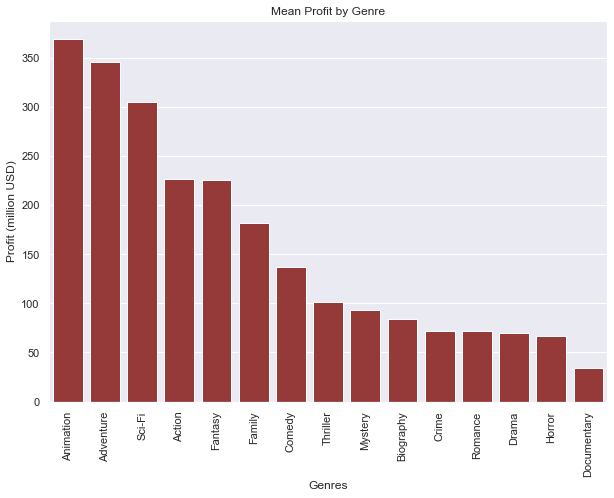

In [647]:
sns.set(rc={'figure.figsize':(10,7)}) #Setting the Chart area size
g=sns.barplot(x=genres_profit.index,y=genres_profit.Profit/1000000,color="brown")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Mean Profit by Genre") 
g.set(xlabel='Genres', ylabel='Profit (million USD)')
plt.show()

In [648]:
#df_merged.corr(method ='pearson')

Text(0, 0.5, 'Profit (in Billion)')

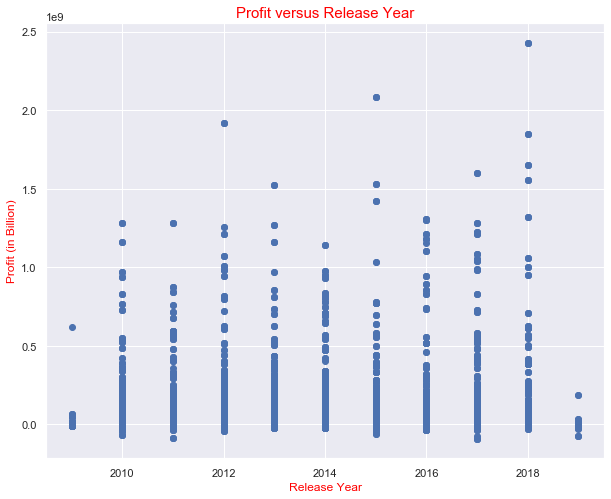

In [649]:
## Visualizing profit in last ten years using scatter plot
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df_merged['release_year'],df_merged['Profit'])
ax.set_title('Profit versus Release Year',fontsize=15,color='red')
ax.set_xlabel('Release Year',color='red')
ax.set_ylabel('Profit (in Billion)',color='red')

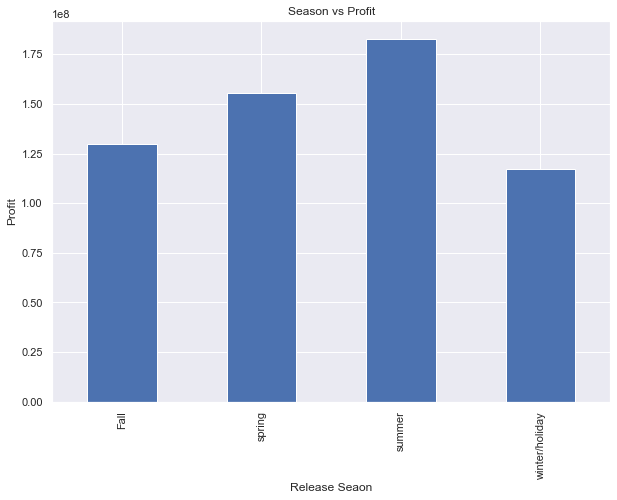

In [650]:
df_decade_mean = df_merged.groupby('release_season')['Profit'].mean()
df_decade_mean.head()
fig = df_decade_mean.plot(kind = 'bar')
plt.title('Season vs Profit')
plt.xlabel('Release Seaon')
plt.ylabel('Profit')
plt.rcParams["figure.figsize"] = [5, 5]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 8 to 3035
Data columns (total 16 columns):
tconst               9 non-null object
movie                9 non-null object
runtime_minutes      9 non-null int32
genres               9 non-null object
average_rating       9 non-null float64
release_date         9 non-null datetime64[ns]
production_budget    9 non-null int64
domestic_gross       9 non-null int64
worldwide_gross      9 non-null int64
Collections          9 non-null int64
Profit               9 non-null int64
release_year         9 non-null int64
Month                9 non-null object
release_month        9 non-null int64
release_season       9 non-null object
release_quarter      9 non-null object
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(6)
memory usage: 1.2+ KB


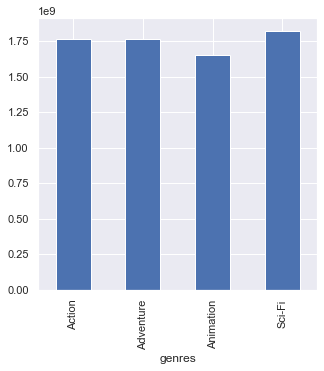

In [651]:
df=df_merged[(df_merged['Profit']>1500000000) & (df_merged['release_season']=='summer')]
df.info()
#df=genres_profit[genres_profit['release_season']=='summer']
#df.info()
df_lang_movie = df.groupby(['genres'])['Profit'].mean()
fig = df_lang_movie.plot(kind = 'bar')

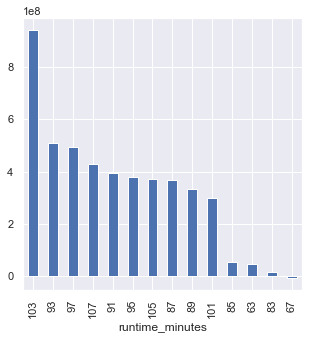

In [652]:
df_scifi = df_merged[(df_merged['runtime_minutes']) & (df_merged['genres'] == 'Animation')]
df_scifi
#df_scifi['runtime_minutes'] = df_scifi['runtime_minutes'].sort_values(ascending=True)
#df_scifi = df_scifi.sort_values(by=['Profit'], ascending=True)
# df=genres_profit[genres_profit['release_season']=='summer']
#df_merged.groupby('genres')['Profit'].mean().sort_values(ascending=False)
df_scifi_run = df_scifi.groupby(['runtime_minutes'])['Profit'].mean().sort_values(ascending=False)
fig = df_scifi_run.plot(kind='bar')

In [653]:
df_neg_profit=df_merged[df_merged[('Profit')] <= 0]
df_neg_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 3180
Data columns (total 16 columns):
tconst               1156 non-null object
movie                1156 non-null object
runtime_minutes      1156 non-null int32
genres               1156 non-null object
average_rating       1156 non-null float64
release_date         1156 non-null datetime64[ns]
production_budget    1156 non-null int64
domestic_gross       1156 non-null int64
worldwide_gross      1156 non-null int64
Collections          1156 non-null int64
Profit               1156 non-null int64
release_year         1156 non-null int64
Month                1156 non-null object
release_month        1156 non-null int64
release_season       1156 non-null object
release_quarter      1156 non-null object
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(6)
memory usage: 149.0+ KB


In [654]:
#getting the top genre categories
top_genres_loss = df_neg_profit['genres'].value_counts()
top_genres__loss_list = list(top_genres_loss.head(15).keys())
#top_genres_list

main_genres_loss = []
for n in top_genres_list:
    main_genres_loss.append(df_neg_profit.loc[(df_neg_profit['genres'] == n)])

main_genres_loss = pd.concat(main_genres_loss)

genres_loss = main_genres_loss.groupby(main_genres_loss['genres']).mean()
genres_loss = genres_loss.sort_values(by='Profit',ascending=False)
genres_loss.info()
genres_loss['Profit'].max()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Documentary to Animation
Data columns (total 9 columns):
runtime_minutes      15 non-null float64
average_rating       15 non-null float64
production_budget    15 non-null float64
domestic_gross       15 non-null float64
worldwide_gross      15 non-null float64
Collections          15 non-null float64
Profit               15 non-null float64
release_year         15 non-null float64
release_month        15 non-null float64
dtypes: float64(9)
memory usage: 1.2+ KB


-2509837.620689655

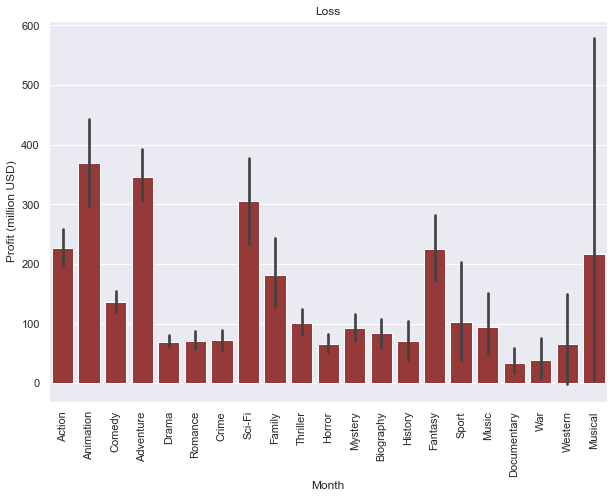

In [655]:
sns.set(rc={'figure.figsize':(10,7)}) #Setting the Chart area size
h=sns.barplot(x=df_merged.genres,y=df_merged.Profit/1000000,color="brown")
h.set_xticklabels(h.get_xticklabels(),rotation=90)
h.set_title("Loss") 
h.set(xlabel='Month', ylabel='Profit (million USD)')
plt.show()

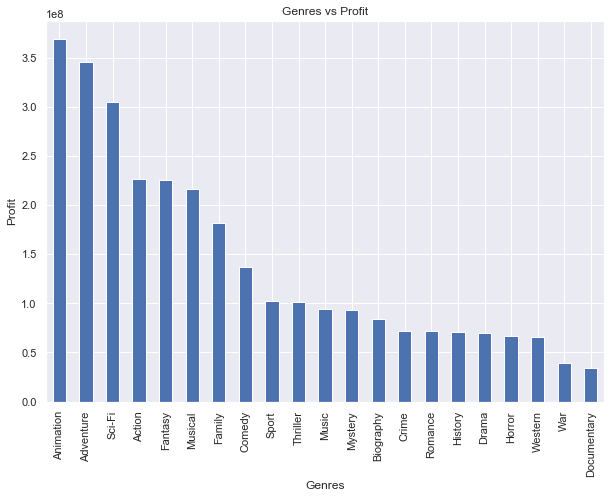

In [656]:
df_decade_mean = df_merged.groupby('genres')['Profit'].mean().sort_values(ascending=False)
df_decade_mean.head()
fig = df_decade_mean.plot(kind = 'bar')
plt.title('Genres vs Profit')
plt.xlabel('Genres')
plt.ylabel('Profit')
plt.rcParams["figure.figsize"] = [8, 5]

In [657]:
#ax = df_merged.plot.bar(x='genres', y='Profit', rot=90)

In [658]:
column_names=list(df_merged.groupby('genres')['genres','Profit'].mean().sort_values(by = 'Profit',ascending=False))

In [659]:
column_names

['Profit']

In [660]:
#new_df.head(20)

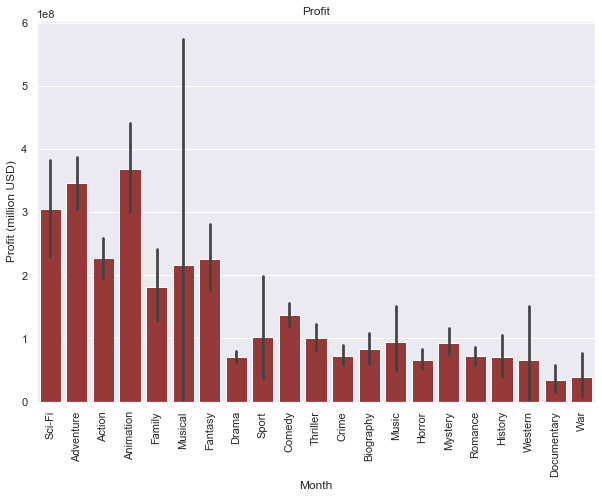

In [661]:
new_df = df_merged[['genres', 'Profit']].sort_values(by='Profit', ascending=False)
sns.set(rc={'figure.figsize': (10, 7)})  # Setting the Chart area size
h = sns.barplot(x='genres', y='Profit', data=new_df, color="brown")
h.set_xticklabels(h.get_xticklabels(), rotation=90)
h.set_title("Profit")
h.set(xlabel='Genres', ylabel='Profit (million USD)')
plt.show()

In [662]:
#df_summer = df_merged[df_merged['release_season']=='summer']

In [663]:
#df_summer

In [664]:
#summer_plot_df = df_merged.filter(['Profit','average_rating'])
#boxplot = sns.boxplot(x='Profit',y='average_rating',data=summer_plot_df, palette="colorblind")
#boxplot.set(ylabel='Runtime', title=' Profit')

In [665]:
summer_plot_df

,Profit,average_rating
0,-44926294,1.9
0,-44926294,1.9
0,-44926294,1.9
1,2075804,7.5
3,-14965870,6.1
...,...,...
3179,104203361,7.3
3180,-1401194,7.4
3180,-1401194,7.4
3180,-1401194,7.4


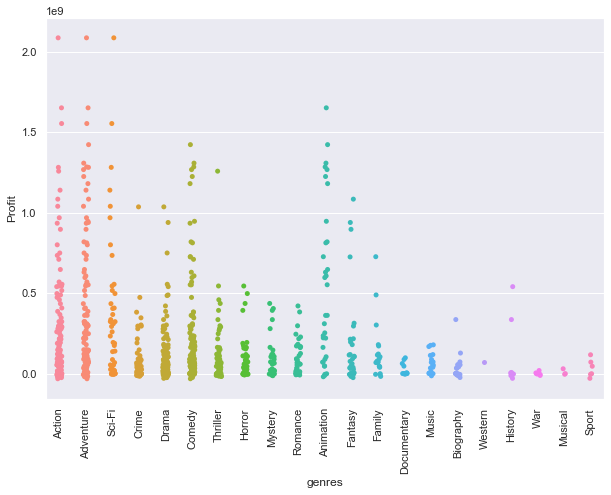

In [666]:
ax = sns.stripplot(x="genres", y="Profit", data=df_summer)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [667]:
df_losses=df_merged[(df_merged['Profit']<=-20000000)]
df_losses

,tconst,movie,runtime_minutes,genres,average_rating,release_date,production_budget,domestic_gross,worldwide_gross,Collections,Profit,release_year,Month,release_month,release_season,release_quarter
0,tt0249516,foodfight,91,Action,1.9,2012-12-31,45000000,0,73706,73706,-44926294,2012,December,12,winter/holiday,Q4
0,tt0249516,foodfight,91,Animation,1.9,2012-12-31,45000000,0,73706,73706,-44926294,2012,December,12,winter/holiday,Q4
0,tt0249516,foodfight,91,Comedy,1.9,2012-12-31,45000000,0,73706,73706,-44926294,2012,December,12,winter/holiday,Q4
218,tt1014763,child44,137,Crime,6.5,2015-04-17,50000000,1224330,8004221,9228551,-40771449,2015,April,4,spring,Q2
218,tt1014763,child44,137,Drama,6.5,2015-04-17,50000000,1224330,8004221,9228551,-40771449,2015,April,4,spring,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,tt4280822,fightvalley,90,Drama,2.7,2016-07-22,20000000,0,0,0,-20000000,2016,July,7,summer,Q3
3020,tt4788744,unhinged,95,Thriller,4.2,2019-09-30,29000000,0,0,0,-29000000,2019,September,9,Fall,Q3
3086,tt5519340,bright,117,Action,6.4,2017-12-13,90000000,0,0,0,-90000000,2017,December,12,winter/holiday,Q4
3086,tt5519340,bright,117,Crime,6.4,2017-12-13,90000000,0,0,0,-90000000,2017,December,12,winter/holiday,Q4


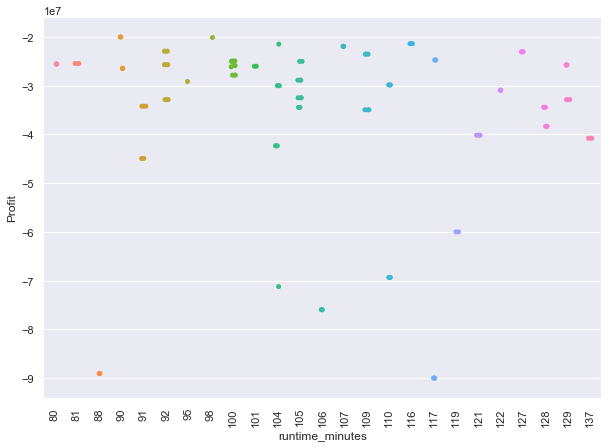

In [668]:
#ax = sns.stripplot(x="runtime_minutes", y="Profit", data=df_losses)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [669]:
#loss_df = df_losses[df_losses['Profit'], df_losses['genres']]
df_losses.info()
#boxplot = sns.boxplot(xlabel=df_losses['Profit'],ylabel=df_losses['runtime_minutes'], data=df_losses, palette="colorblind")
#boxplot.set(ylabel='$', title=' Budget Vs Gross')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 3086
Data columns (total 16 columns):
tconst               116 non-null object
movie                116 non-null object
runtime_minutes      116 non-null int32
genres               116 non-null object
average_rating       116 non-null float64
release_date         116 non-null datetime64[ns]
production_budget    116 non-null int64
domestic_gross       116 non-null int64
worldwide_gross      116 non-null int64
Collections          116 non-null int64
Profit               116 non-null int64
release_year         116 non-null int64
Month                116 non-null object
release_month        116 non-null int64
release_season       116 non-null object
release_quarter      116 non-null object
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(6)
memory usage: 17.5+ KB


In [670]:
#plt.hlines(y=df_losses.Profit, xmin=0, xmax=df_losses['Profit'], color='skyblue')
#plt.plot(df_merged['Profit'], df_merged.release_quarter, "D")
#plt.yticks(df_losses['genres'], df_losses['Profit'])
#plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

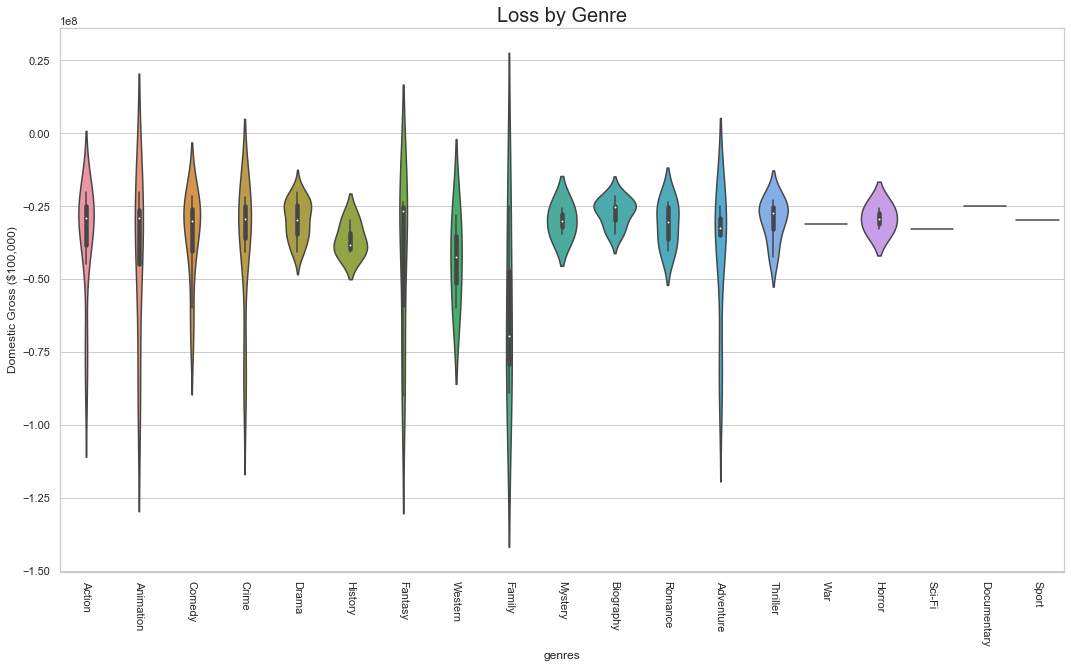

In [674]:
# Losses according to Genre
plt.figure(figsize=(18,10))
# Set theme
sns.set_style('whitegrid')
plt.title("Loss by Genre", fontsize=20)
# Violin plot
sns.violinplot(x='genres', y='Profit', data=df_losses)
plt.ylabel('Domestic Gross ($100,000)')
plt.xticks(rotation=-90)

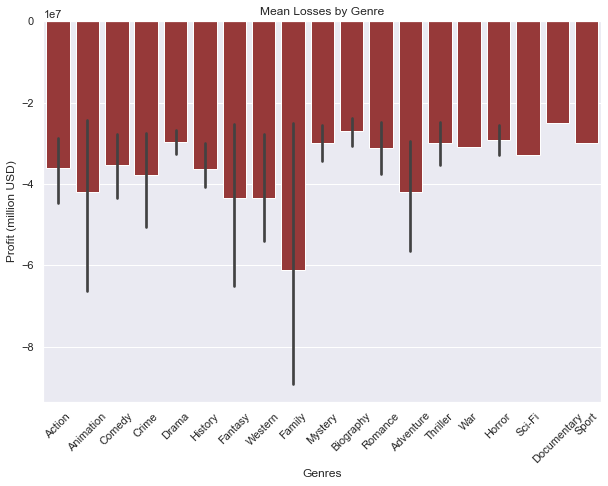

In [673]:
sns.set(rc={'figure.figsize':(10,7)}) #Setting the Chart area size
h=sns.barplot(x=df_losses.genres,y=df_losses.Profit,color="brown")
h.set_xticklabels(h.get_xticklabels(),rotation=45)
h.set_title("Mean Losses by Genre") 
h.set(xlabel='Genres', ylabel='Profit (million USD)')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

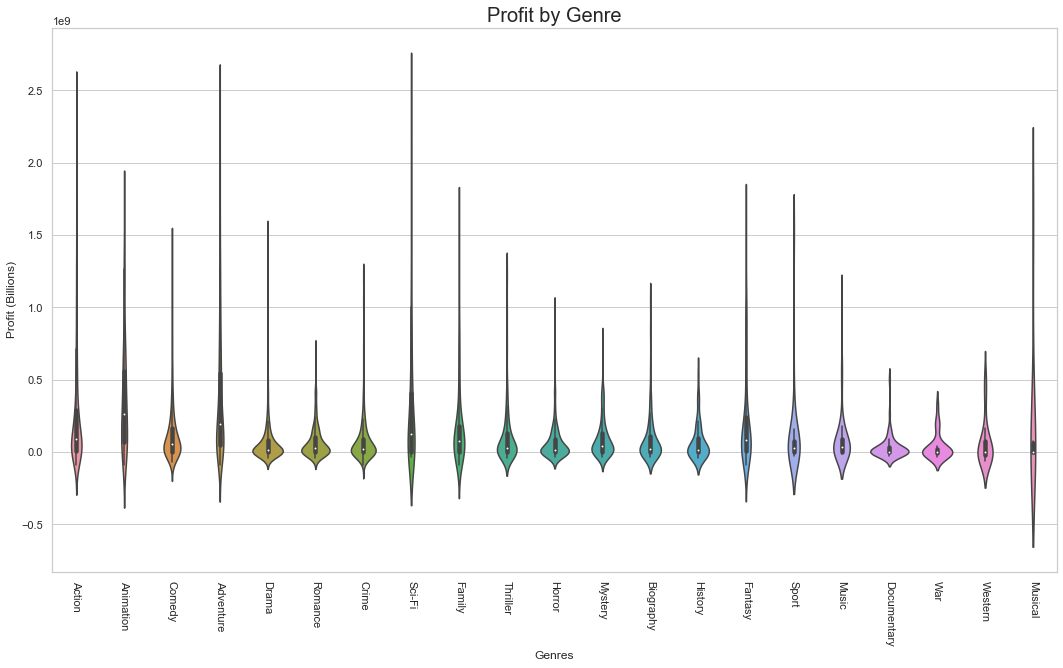

In [676]:
# Profit according to Genre
plt.figure(figsize=(18,10))
# Set theme
sns.set_style('whitegrid')
plt.title("Profit by Genre", fontsize=20)
# Violin plot
sns.violinplot(x='genres', y='Profit', data=df_merged)
plt.xlabel('Genres')
plt.ylabel('Profit (Billions)')
plt.xticks(rotation=-90)